In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
print("Current Dir", os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","Valid")


Current Dir c:\Users\rchet\Documents\potato-disease-project


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\rchet\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │   190,513,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,528,147 (726.81 MB)

 Trainable params: 190,528,147 (726.81 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
training_history=cnn.fit(training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4097 - loss: 171.1492 - val_accuracy: 0.6067 - val_loss: 30.6239
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5992 - loss: 37.5093 - val_accuracy: 0.8467 - val_loss: 3.4718
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8167 - loss: 6.3042 - val_accuracy: 0.7900 - val_loss: 5.4325
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8493 - loss: 3.6806 - val_accuracy: 0.8733 - val_loss: 2.6039
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8984 - loss: 1.9846 - val_accuracy: 0.7667 - val_loss: 3.8225
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8565 - loss: 2.5385 - val_accuracy: 0.9167 - val_loss: 1.2058
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9513 - loss: 0.4918 - val_accuracy: 0.8567 - val_loss: 2.8785
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9188 - loss: 1.3471 - val_accuracy: 0.9133 - val_l

In [17]:
train_loss,train_acc = cnn.evaluate(training_set)
print("Training Accuracy",train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9896 - loss: 0.0250
Training Accuracy 0.995555579662323


In [18]:
valid_loss,valid_acc = cnn.evaluate(validation_set)
print("Validation Accuracy",valid_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9044 - loss: 0.7890
Validation Accuracy 0.9200000166893005


In [21]:
cnn.save('trained_plant_disease_model.keras')

In [19]:
training_history.history

{'accuracy': [0.4511111080646515,
  0.652222216129303,
  0.8022222518920898,
  0.8377777934074402,
  0.902222216129303,
  0.8811110854148865,
  0.9511111378669739,
  0.9344444274902344,
  0.9688888788223267,
  0.9833333492279053],
 'loss': [112.97589111328125,
  25.963314056396484,
  6.791682720184326,
  3.8350560665130615,
  1.8016108274459839,
  1.9005684852600098,
  0.4572145938873291,
  0.949852705001831,
  0.23162111639976501,
  0.09195898473262787],
 'val_accuracy': [0.6066666841506958,
  0.846666693687439,
  0.7900000214576721,
  0.8733333349227905,
  0.7666666507720947,
  0.9166666865348816,
  0.8566666841506958,
  0.9133333563804626,
  0.9133333563804626,
  0.9200000166893005],
 'val_loss': [30.62385368347168,
  3.471822500228882,
  5.432548999786377,
  2.6038777828216553,
  3.8225035667419434,
  1.2057689428329468,
  2.8784584999084473,
  0.900989294052124,
  0.7469127774238586,
  0.704256534576416]}

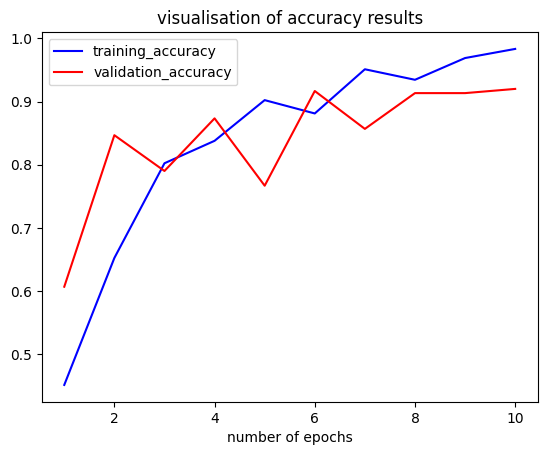

In [20]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='blue',label='training_accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='red',label='validation_accuracy')
plt.xlabel('number of epochs')
plt.title('visualisation of accuracy results')
plt.legend()
plt.show()

In [15]:
print(tf.__version__)

2.18.0
